<a href="https://colab.research.google.com/github/ruslanTankist/ml_works/blob/main/HW11_LSTM/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Попробуйте предсказать цену акций (https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv) с помощью LSTM.



In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import io

In [ ]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSE-Tata-Global-Beverages-Limited.csv to NSE-Tata-Global-Beverages-Limited.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['NSE-Tata-Global-Beverages-Limited.csv']))
dataset_train=data.iloc[0:900,1:2]
dataset_test=data.iloc[900:,1:2]
training_set = data.iloc[0:900, 1:2].values
testing_set=data.iloc[900:,1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

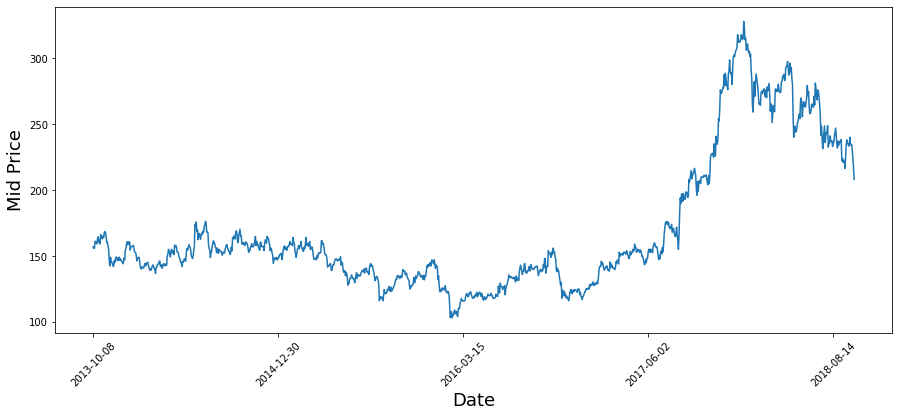

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],300),data['Date'].loc[::300],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(20,900):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.4))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
28/28 [==============================] - 5s 27ms/step - loss: 0.0597
Epoch 2/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0075
Epoch 3/50
28/28 [==============================] - 1s 29ms/step - loss: 0.0066
Epoch 4/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0057
Epoch 5/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0047
Epoch 6/50
28/28 [==============================] - 1s 29ms/step - loss: 0.0043
Epoch 7/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0055
Epoch 8/50
28/28 [==============================] - 1s 29ms/step - loss: 0.0054
Epoch 9/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0052
Epoch 10/50
28/28 [==============================] - 1s 27ms/step - loss: 0.0054
Epoch 11/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0048
Epoch 12/50
28/28 [==============================] - 1s 28ms/step - loss: 0.0042
Epoch 13/50
28/28 [==================

In [ ]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

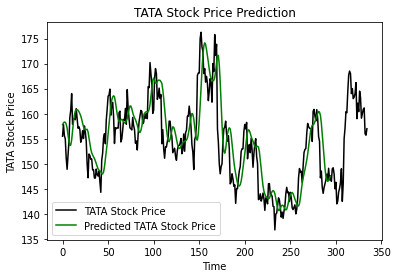

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()